GRUPO:
HENNY ROCIO CARRILLO - hcarril42467@universidadean.edu.co
WILBER ALEXANDER RODRIGUEZ CASTRO - wrodrig96546@universidadean.edu.co

TEMA: Actividad evaluativa. Clasificación de Noticias Usando RNNs y LSTMs 

Ejercicio 1

In [5]:
import pandas as pd

# Ruta correcta al archivo
ruta_archivo = r'C:\Users\analistaderiesgo1\Procesamiento del Lenguaje Natural\Datos\Noticias.xlsx'

# Cargar el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
print(df.head())


   Columna1                                            Enlaces  \
0         0  https://www.eltiempo.com/agresion-contra-un-op...   
1         1  https://www.eltiempo.com/archivo/documento/CMS...   
2         2  https://www.eltiempo.com/archivo/documento/CMS...   
3         3  https://www.eltiempo.com/archivo/documento/CMS...   
4         4  https://www.eltiempo.com/archivo/documento/CMS...   

                                              Título  \
0  Operador de grúa quedó inconsciente tras agres...   
1   Usaquén, primera en infracciones por mal parqueo   
2  'Me atracaron y vi un arma que me heló la sang...   
3  Escoltas mal estacionados, dolor de cabeza de ...   
4  Radicado primer proyecto que autorizaría union...   

                                                info  \
0  El conductor de una moto le lanzó el casco y p...   
1  La localidad ocupa el primer lugar en comparen...   
2  Un ciudadano relata cómo cuatro hombres lo rob...   
3  Las zonas de restaurantes se convierten

Las categorías disponibles en 'Etiqueta':
Etiqueta
archivo                 9187
colombia                 934
deportes                 727
opinion                  532
mundo                    446
cultura                  430
economia                 367
justicia                 343
bogota                   311
vida                     268
politica                 252
tecnosfera               214
salud                    106
historias-el-tiempo       57
mundial                   47
contenido-comercial       34
elecciones                33
unidad-investigativa      27
podcast                   20
foro-w                    18
bocas                     15
carrusel                   8
datos                      7
lecturas-dominicales       6
mas-contenido              4
especiales                 3
Name: count, dtype: int64


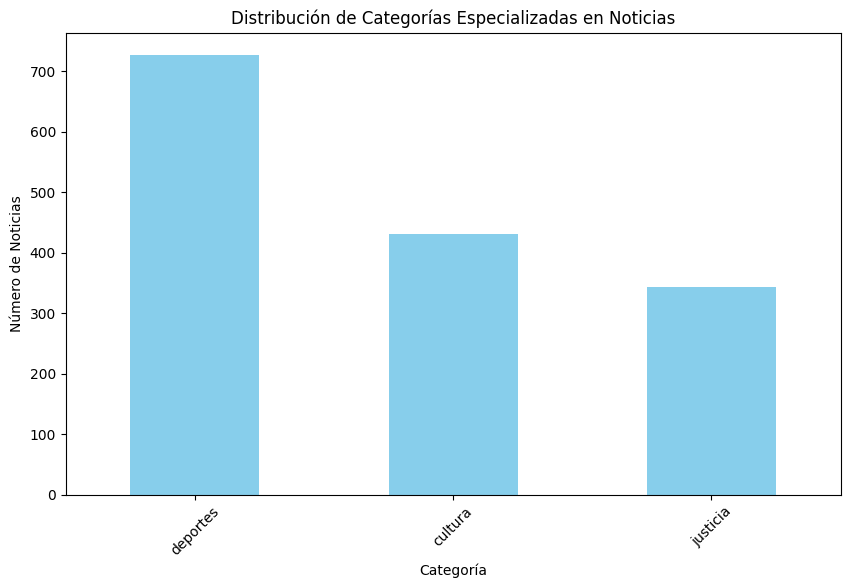


Distribución de las categorías especializadas:
Etiqueta
deportes    727
cultura     430
justicia    343
Name: count, dtype: int64


In [7]:
# Verificar si la columna 'Etiqueta' existe
if 'Etiqueta' in df.columns:
    print(f"Las categorías disponibles en 'Etiqueta':\n{df['Etiqueta'].value_counts()}")
else:
    print("La columna 'Etiqueta' no se encuentra en el archivo.")

# Filtrar solo las categorías especializadas
categorias_especializadas = ['deportes', 'cultura', 'economía', 'justicia']
df_filtrado = df[df['Etiqueta'].isin(categorias_especializadas)]

# Verificar la distribución de las categorías en el DataFrame filtrado
categoria_counts = df_filtrado['Etiqueta'].value_counts()

# Visualizar la distribución con un gráfico de barras
plt.figure(figsize=(10, 6))
categoria_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Categorías Especializadas en Noticias')
plt.xlabel('Categoría')
plt.ylabel('Número de Noticias')
plt.xticks(rotation=45)
plt.show()

# Mostrar la distribución de las categorías
print(f"\nDistribución de las categorías especializadas:\n{categoria_counts}")


Ejercicio 2

In [19]:
# Definir las categorías especializadas
categorias_relevantes = ['deportes', 'cultura', 'economía', 'justicia']

# Filtrar las noticias que pertenecen a las categorías relevantes
df_filtrado = df[df['Etiqueta'].isin(categorias_relevantes)]

# Verificar la distribución de las categorías después del filtrado
categoria_counts_filtrado = df_filtrado['Etiqueta'].value_counts()

# Mostrar la distribución de las categorías después del filtrado
print(f"Distribución de las categorías después del filtrado:\n{categoria_counts_filtrado}")


Distribución de las categorías después del filtrado:
Etiqueta
deportes    727
cultura     430
justicia    343
Name: count, dtype: int64


In [20]:
# Para equilibrar las categorías, tomamos el número mínimo de noticias de cada categoría
min_categoria_count = categoria_counts_filtrado.min()

# Crear un DataFrame equilibrado con el mismo número de noticias para cada categoría
df_equilibrado = df_filtrado.groupby('Etiqueta').apply(lambda x: x.sample(min_categoria_count, random_state=42))

# Verificar la distribución de las categorías después de equilibrar
categoria_counts_equilibrado = df_equilibrado['Etiqueta'].value_counts()

# Mostrar la distribución de las categorías después de equilibrar
print(f"\nDistribución de las categorías después de equilibrar:\n{categoria_counts_equilibrado}")

# Mostrar las primeras filas del DataFrame equilibrado para verificar los resultados
print("\nPrimeras filas del DataFrame equilibrado:")
print(df_equilibrado.head())



Distribución de las categorías después de equilibrar:
Etiqueta
cultura     343
deportes    343
justicia    343
Name: count, dtype: int64

Primeras filas del DataFrame equilibrado:
                Columna1                                            Enlaces  \
Etiqueta                                                                      
cultura  10909     10909  https://www.eltiempo.com/cultura/musica-y-libr...   
         10562     10562  https://www.eltiempo.com/cultura/cine-y-tv/cri...   
         10664     10664  https://www.eltiempo.com/cultura/gastronomia/c...   
         10517     10517  https://www.eltiempo.com/cultura/arte-y-teatro...   
         10848     10848  https://www.eltiempo.com/cultura/musica-y-libr...   

                                                           Título  \
Etiqueta                                                            
cultura  10909           Luis Miguel, 50 años de un sol sin ocaso   
         10562                         Críticamente: Aquí 

C:\Users\analistaderiesgo1\AppData\Local\Temp\ipykernel_21172\3601483653.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_equilibrado = df_filtrado.groupby('Etiqueta').apply(lambda x: x.sample(min_categoria_count, random_state=42))


Ejercicio 3

In [22]:
# Función de preprocesamiento de texto
def preprocesar_texto(texto):
    # Verificar si el texto no es nulo y es una cadena
    if isinstance(texto, str):
        # 1. Convertir a minúsculas
        texto = texto.lower()

        # 2. Eliminar números y puntuación
        texto = re.sub(r'[^a-záéíóúñ\s]', '', texto)  # Solo letras y espacios

        # 3. Eliminar stopwords (palabras comunes)
        palabras = texto.split()
        palabras = [palabra for palabra in palabras if palabra not in stop_words]

        # 4. Unir las palabras procesadas
        texto = ' '.join(palabras)
    else:
        # Si el texto no es una cadena, devolvemos una cadena vacía
        texto = ''
    
    return texto



In [23]:
# Aplicar preprocesamiento a la columna 'contenido' de tu DataFrame
df_equilibrado['Texto_preprocesado'] = df_equilibrado['contenido'].apply(preprocesar_texto)


In [24]:
# Mostrar las primeras filas para verificar el resultado
print(df_equilibrado[['contenido', 'Texto_preprocesado']].head())


                                                        contenido  \
Etiqueta                                                            
cultura  10909  Siendo un niño, ‘El Sol de México’ se convirti...   
         10562  Las películas de Víctor Gaviria constituyen un...   
         10664  Del inagotable repertorio de las salsas, no cr...   
         10517  La Casa 1537, ubicada en la calle del Colegio ...   
         10848  Judas Priest, la banda británica fundamental e...   

                                               Texto_preprocesado  
Etiqueta                                                           
cultura  10909  siendo niño sol méxico convirtió auténtico fen...  
         10562  películas víctor gaviria constituyen capítulo ...  
         10664  inagotable repertorio salsas creo recordar sup...  
         10517  casa ubicada calle colegio centro histórico ca...  
         10848  judas priest banda británica fundamental escen...  


In [26]:
# Inicializar el tokenizador
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_equilibrado['Texto_preprocesado'])

# Convertir el texto a secuencias de índices
secuencias = tokenizer.texts_to_sequences(df_equilibrado['Texto_preprocesado'])


In [27]:
# Definir el tamaño máximo de la secuencia (puedes ajustarlo según el tamaño de tus datos)
max_len = 100  # Ejemplo de longitud máxima, ajusta según tu caso

# Aplicar padding a las secuencias
secuencias_padded = pad_sequences(secuencias, maxlen=max_len, padding='post')


In [31]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(secuencias_padded, etiquetas, test_size=0.2, random_state=42)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Construir el modelo LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(LSTM(100))
model.add(Dense(len(df_equilibrado['Etiqueta'].unique()), activation='softmax'))

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.3153 - loss: 1.0996 - val_accuracy: 0.3155 - val_loss: 1.0990
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3502 - loss: 1.0968 - val_accuracy: 0.3155 - val_loss: 1.0958
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3536 - loss: 1.0972 - val_accuracy: 0.3155 - val_loss: 1.0962
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3451 - loss: 1.0966 - val_accuracy: 0.3155 - val_loss: 1.0933
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3686 - loss: 1.0926 - val_accuracy: 0.3155 - val_loss: 1.0960


In [34]:
# Construir el modelo LSTM
model = Sequential()

# Capa de embedding para representar las palabras
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))

# Capa LSTM
model.add(LSTM(100))

# Capa de salida con una neurona por categoría
model.add(Dense(len(df_equilibrado['Etiqueta'].unique()), activation='softmax'))

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [35]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.3311 - loss: 1.0996 - val_accuracy: 0.3155 - val_loss: 1.0966
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.3750 - loss: 1.0955 - val_accuracy: 0.3155 - val_loss: 1.0934
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.3226 - loss: 1.0943 - val_accuracy: 0.3155 - val_loss: 1.0937
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.3565 - loss: 1.0976 - val_accuracy: 0.3010 - val_loss: 1.1001
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3585 - loss: 1.0958 - val_accuracy: 0.3155 - val_loss: 1.0933


In [36]:
# Evaluar el modelo
pérdida, precisión = model.evaluate(X_test, y_test)
print(f"Precisión del modelo: {precisión * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3276 - loss: 1.0895
Precisión del modelo: 31.55%


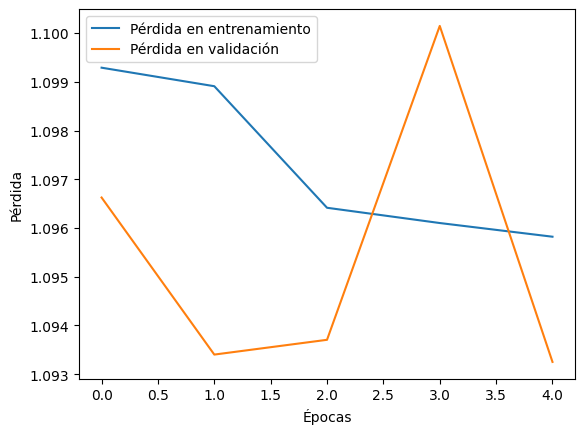

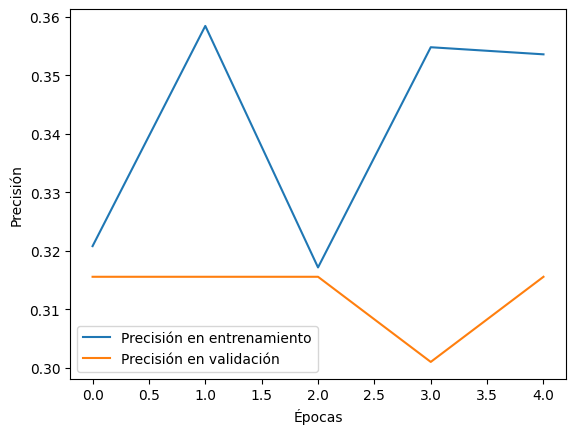

In [38]:
import matplotlib.pyplot as plt

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()



Ejercicio 4

In [41]:
from sklearn.model_selection import train_test_split

# Supongamos que ya tienes un DataFrame con las columnas 'Texto_preprocesado' y 'Etiqueta'

# Dividir los datos en características (X) y etiquetas (y)
X = df_equilibrado['Texto_preprocesado']
y = df_equilibrado['Etiqueta']

# Dividir en entrenamiento y validación (80% entrenamiento, 20% validación)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% para validación
    random_state=42,  # Para obtener la misma división cada vez
    stratify=y  # Asegura que las proporciones de las categorías se mantengan
)

# Verificar las primeras filas de los conjuntos de entrenamiento y validación
print("Conjunto de entrenamiento:")
print(X_train.head())
print("\nConjunto de validación:")
print(X_test.head())



Conjunto de entrenamiento:
Etiqueta       
justicia  12160    tras conocerse resultados elecciones nuevo par...
          12134    edwin vivero hidalgo profesión motorista ayuda...
          12242    corte constitucional aseguró instituciones edu...
cultura   10511    encuentre cada semana tiempo agenda exposicion...
deportes  11515    brasil arriba marcador partido amistoso colomb...
Name: Texto_preprocesado, dtype: object

Conjunto de validación:
Etiqueta       
deportes  11492    técnico argentino reinaldo mostaza merlo reemp...
          10985    dave brailsford mánager equipo ineos wout poel...
justicia  12262    través cuenta twitter abogado julio josé orozc...
deportes  11147    tras descenso consumado fortaleza buscará sába...
justicia  12446    ine marie eriksen sreide canciller noruega paí...
Name: Texto_preprocesado, dtype: object


In [42]:
# Tokenización del texto
tokenizer = Tokenizer(num_words=5000)  # Consideramos las 5000 palabras más frecuentes
tokenizer.fit_on_texts(X_train)  # Ajustamos el tokenizer con el conjunto de entrenamiento

# Convertir los textos a secuencias numéricas
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Aplicar padding para asegurar que todas las secuencias tengan la misma longitud
max_len = 100  # Definir la longitud máxima de las secuencias

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Verificar las formas de las secuencias después de aplicar padding
print(f"Forma de X_train_pad: {X_train_pad.shape}")
print(f"Forma de X_test_pad: {X_test_pad.shape}")


Forma de X_train_pad: (823, 100)
Forma de X_test_pad: (206, 100)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Definir el modelo
model = Sequential()

# Capa de Embedding (convertir palabras a vectores densos)
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))

# Capa LSTM para procesar las secuencias
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Capa densa para la clasificación
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout para evitar sobreajuste

# Capa de salida con activación softmax (para clasificación multiclase)
model.add(Dense(len(y.unique()), activation='softmax'))

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy',  # Usamos sparse_categorical_crossentropy para clasificación multiclase
              optimizer='adam',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Ajustar y transformar las etiquetas de entrenamiento y prueba
y_train_encoded = label_encoder.fit_transform(y_train)  # Solo se ajusta a los datos de entrenamiento
y_test_encoded = label_encoder.transform(y_test)  # Usar el mismo codificador para transformar las etiquetas de prueba



In [46]:
print(f"Tipo de y_train_encoded: {type(y_train_encoded)}")
print(f"Tipo de y_test_encoded: {type(y_test_encoded)}")
print(f"Shape de y_train_encoded: {y_train_encoded.shape}")
print(f"Shape de y_test_encoded: {y_test_encoded.shape}")


Tipo de y_train_encoded: <class 'numpy.ndarray'>
Tipo de y_test_encoded: <class 'numpy.ndarray'>
Shape de y_train_encoded: (823,)
Shape de y_test_encoded: (206,)


In [47]:
# Entrenar el modelo
history = model.fit(
    X_train_pad, y_train_encoded,  # Usar las etiquetas codificadas
    epochs=5,
    batch_size=32,
    validation_data=(X_test_pad, y_test_encoded)  # Usar las etiquetas codificadas también en la validación
)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.3551 - loss: 1.0981 - val_accuracy: 0.5000 - val_loss: 1.0897
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6355 - loss: 0.9979 - val_accuracy: 0.6893 - val_loss: 0.7468
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.7300 - loss: 0.7122 - val_accuracy: 0.7961 - val_loss: 0.6807
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8722 - loss: 0.4559 - val_accuracy: 0.9078 - val_loss: 0.3161
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9406 - loss: 0.2797 - val_accuracy: 0.8835 - val_loss: 0.6738
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8754 - loss: 0.6894
Loss: 0.6737582683563232
Accuracy: 0.8834951519966125


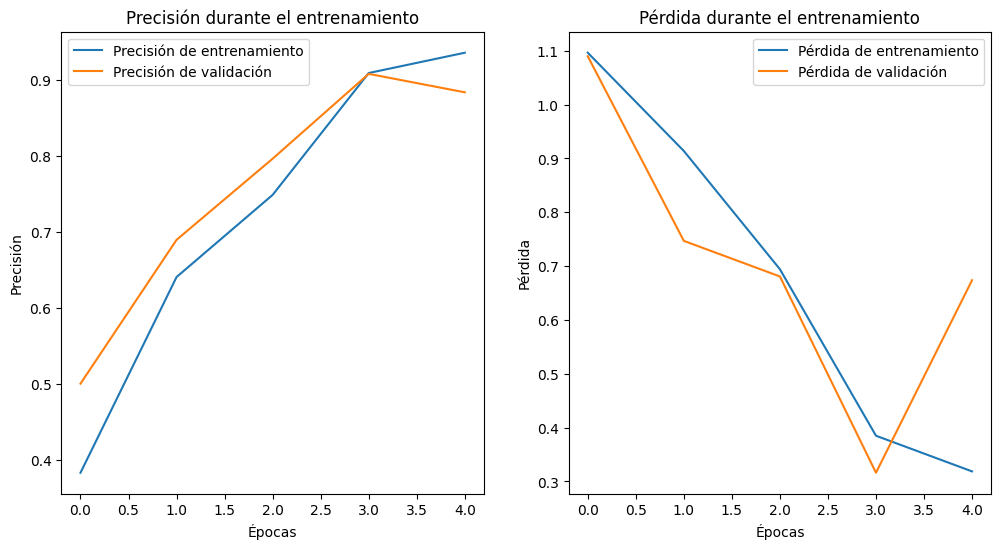

In [49]:
import matplotlib.pyplot as plt

# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


Ejercicio 5

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definir parámetros
max_features = 10000  # Número máximo de palabras a considerar
embedding_dim = 100   # Tamaño de la representación vectorial de cada palabra
maxlen = 100         # Longitud máxima de las secuencias (en palabras)

# Crear el modelo RNN
model = Sequential()

# Capa de Embedding
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))

# Capa LSTM
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# Capa densa de salida con activación softmax (para clasificación multiclase)
model.add(Dense(4, activation='softmax'))  # 4 categorías (deportes, cultura, economía, justicia)

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(), 
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Crear el tokenizer
tokenizer = Tokenizer(num_words=max_features)

# Ajustar el tokenizer en el conjunto de texto preprocesado
tokenizer.fit_on_texts(df_equilibrado['Texto_preprocesado'])

# Convertir el texto en secuencias de enteros
X = tokenizer.texts_to_sequences(df_equilibrado['Texto_preprocesado'])


In [53]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Aseguramos que las secuencias tengan la misma longitud
X_pad = pad_sequences(X, maxlen=maxlen)


In [54]:
from sklearn.model_selection import train_test_split

# Supongamos que `y` es la variable de etiquetas, asegúrate de que `y` esté bien definida
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y)

# Verificar las formas de los datos
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")


Forma de X_train: (823, 100)
Forma de X_test: (206, 100)


In [57]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustamos el encoder en las etiquetas y las transformamos en valores numéricos
y = label_encoder.fit_transform(df_equilibrado['Etiqueta'])

# Verificar cómo quedaron las etiquetas
print(f"Etiquetas codificadas: {y[:10]}")


Etiquetas codificadas: [0 0 0 0 0 0 0 0 0 0]


In [66]:
import numpy as np

# Asegúrate de que X_train_pad y X_test_pad sean arrays numpy
X_train_pad = np.array(X_train_pad)
X_test_pad = np.array(X_test_pad)



In [68]:
from sklearn.preprocessing import LabelEncoder

# Inicializa el codificador
label_encoder = LabelEncoder()

# Ajusta y transforma las etiquetas de entrenamiento
y_train = label_encoder.fit_transform(y_train)

# Transforma las etiquetas de prueba con el mismo codificador
y_test = label_encoder.transform(y_test)



In [69]:
print(f"Etiquetas codificadas de y_train: {y_train[:10]}")  # Muestra las primeras 10 etiquetas
print(f"Etiquetas codificadas de y_test: {y_test[:10]}")    # Muestra las primeras 10 etiquetas


Etiquetas codificadas de y_train: [1 0 1 0 2 0 1 2 2 2]
Etiquetas codificadas de y_test: [1 2 0 0 1 0 1 2 1 2]


In [70]:
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3080 - loss: 1.2995 - val_accuracy: 0.3350 - val_loss: 1.1137
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3098 - loss: 1.1168 - val_accuracy: 0.3350 - val_loss: 1.1005
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3345 - loss: 1.1098 - val_accuracy: 0.3350 - val_loss: 1.1072
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3489 - loss: 1.1086 - val_accuracy: 0.3350 - val_loss: 1.1142
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3242 - loss: 1.1161 - val_accuracy: 0.3350 - val_loss: 1.0997


In [71]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Pérdida (Loss): {loss}")
print(f"Exactitud (Accuracy): {accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3754 - loss: 1.0973
Pérdida (Loss): 1.0996854305267334
Exactitud (Accuracy): 0.3349514603614807


In [72]:
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)


[[69  0  0]
 [69  0  0]
 [68  0  0]]


In [74]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_classes)
print(report)


              precision    recall  f1-score   support

           0       0.33      1.00      0.50        69
           1       0.00      0.00      0.00        69
           2       0.00      0.00      0.00        68

    accuracy                           0.33       206
   macro avg       0.11      0.33      0.17       206
weighted avg       0.11      0.33      0.17       206



c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

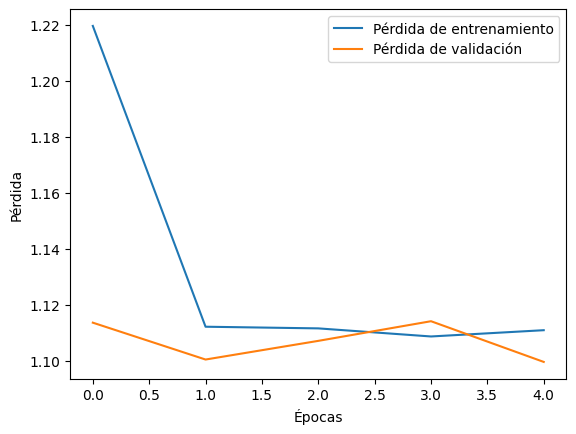

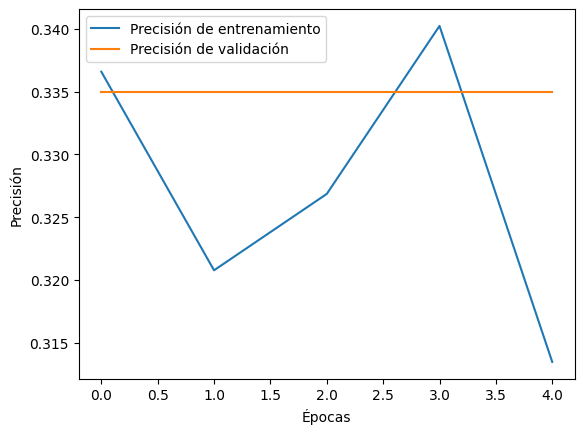

In [75]:
import matplotlib.pyplot as plt

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


Ejercicio 6

In [76]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Definir la arquitectura del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=X_train_pad.shape[1]))  # Capa de embedding
model_lstm.add(LSTM(128, return_sequences=False))  # Capa LSTM con 128 unidades
model_lstm.add(Dropout(0.5))  # Regularización con Dropout
model_lstm.add(Dense(64, activation='relu'))  # Capa densa
model_lstm.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Capa de salida con softmax para clasificación multiclase

# Resumen del modelo
model_lstm.summary()


c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [78]:
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_pad, y_test)
print(f"Pérdida (Loss): {loss_lstm}")
print(f"Exactitud (Accuracy): {accuracy_lstm}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3020 - loss: 1.0989
Pérdida (Loss): 1.0986323356628418
Exactitud (Accuracy): 0.3300970792770386


In [80]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Definir la arquitectura del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=X_train_pad.shape[1]))  # Capa de embedding
model_lstm.add(LSTM(128, return_sequences=False))  # Capa LSTM con 128 unidades
model_lstm.add(Dropout(0.5))  # Regularización con Dropout
model_lstm.add(Dense(64, activation='relu'))  # Capa densa
model_lstm.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Capa de salida con softmax para clasificación multiclase

# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_lstm = model_lstm.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))



Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.3348 - loss: 1.0994 - val_accuracy: 0.3350 - val_loss: 1.0988
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.3340 - loss: 1.0982 - val_accuracy: 0.3350 - val_loss: 1.0986
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.3434 - loss: 1.0992 - val_accuracy: 0.3301 - val_loss: 1.0991
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.3256 - loss: 1.0992 - val_accuracy: 0.3350 - val_loss: 1.0986
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.3327 - loss: 1.1003 - val_accuracy: 0.3350 - val_loss: 1.0988


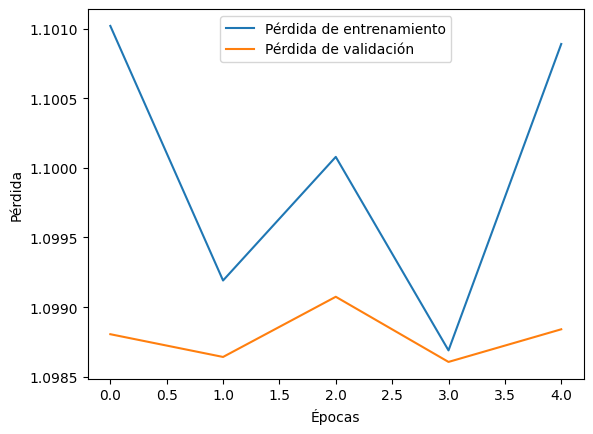

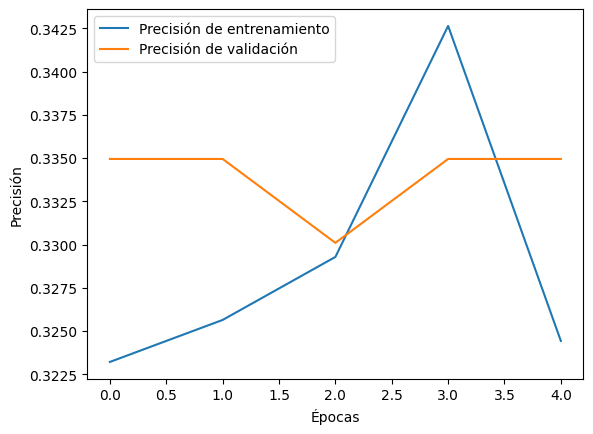

In [81]:
import matplotlib.pyplot as plt

# Graficar la pérdida
plt.plot(history_lstm.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_lstm.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión
plt.plot(history_lstm.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


Ejercicio 7

In [83]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense
from keras.optimizers import Adam

# Definir el modelo RNN
model_rnn = Sequential()

# Capa de embedding
model_rnn.add(Embedding(input_dim=10000, output_dim=128, input_length=X_train_pad.shape[1]))

# Capa RNN (Recurrente)
model_rnn.add(SimpleRNN(64, return_sequences=False))

# Capa de salida con softmax para clasificación multi-clase
model_rnn.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compilar el modelo
model_rnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_rnn.summary()



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
history_rnn = model_rnn.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3191 - loss: 1.1437 - val_accuracy: 0.3350 - val_loss: 1.0991
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3308 - loss: 1.1017 - val_accuracy: 0.3301 - val_loss: 1.1266
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3267 - loss: 1.1111 - val_accuracy: 0.3301 - val_loss: 1.1039
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3019 - loss: 1.1104 - val_accuracy: 0.3301 - val_loss: 1.1317
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3301 - loss: 1.1132 - val_accuracy: 0.3350 - val_loss: 1.1020


In [85]:
from sklearn.metrics import classification_report

# Evaluar el modelo RNN en el conjunto de prueba
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_pad, y_test)
print(f"Modelo RNN - Pérdida: {loss_rnn}, Precisión: {accuracy_rnn}")

# Realizar predicciones
y_pred_rnn = model_rnn.predict(X_test_pad)
y_pred_rnn = np.argmax(y_pred_rnn, axis=1)  # Convertir las probabilidades a clases predichas

# Mostrar el reporte de clasificación (precisión, recall, F1-score)
print("Reporte de clasificación para el modelo RNN:")
print(classification_report(y_test, y_pred_rnn))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3226 - loss: 1.1047
Modelo RNN - Pérdida: 1.1020454168319702, Precisión: 0.3349514603614807
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Reporte de clasificación para el modelo RNN:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.33      1.00      0.50        69
           2       0.00      0.00      0.00        68

    accuracy                           0.33       206
   macro avg       0.11      0.33      0.17       206
weighted avg       0.11      0.33      0.17       206



c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

In [86]:
# Evaluar el modelo LSTM en el conjunto de prueba
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_pad, y_test)
print(f"Modelo LSTM - Pérdida: {loss_lstm}, Precisión: {accuracy_lstm}")

# Realizar predicciones para el modelo LSTM
y_pred_lstm = model_lstm.predict(X_test_pad)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)  # Convertir las probabilidades a clases predichas

# Mostrar el reporte de clasificación (precisión, recall, F1-score) para el modelo LSTM
print("Reporte de clasificación para el modelo LSTM:")
print(classification_report(y_test, y_pred_lstm))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3226 - loss: 1.1002
Modelo LSTM - Pérdida: 1.0988410711288452, Precisión: 0.3349514603614807
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Reporte de clasificación para el modelo LSTM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.33      1.00      0.50        69
           2       0.00      0.00      0.00        68

    accuracy                           0.33       206
   macro avg       0.11      0.33      0.17       206
weighted avg       0.11      0.33      0.17       206



c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

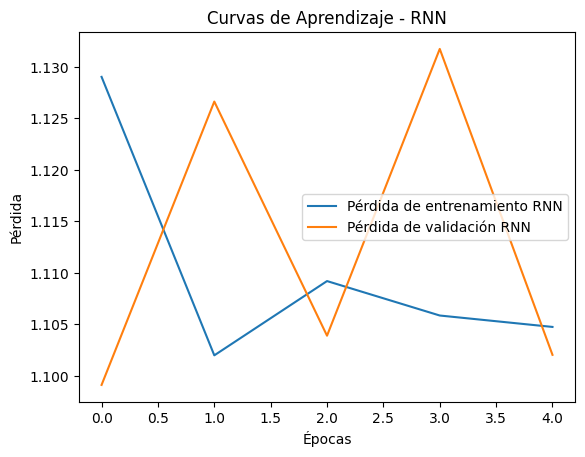

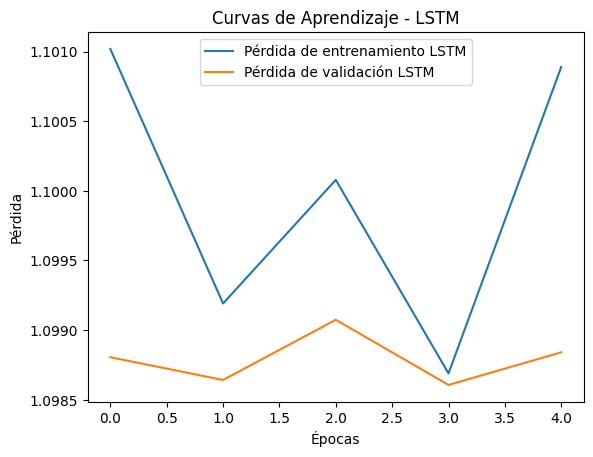

In [87]:
import matplotlib.pyplot as plt

# Graficar la pérdida del modelo RNN
plt.plot(history_rnn.history['loss'], label='Pérdida de entrenamiento RNN')
plt.plot(history_rnn.history['val_loss'], label='Pérdida de validación RNN')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()

# Graficar la pérdida del modelo LSTM
plt.plot(history_lstm.history['loss'], label='Pérdida de entrenamiento LSTM')
plt.plot(history_lstm.history['val_loss'], label='Pérdida de validación LSTM')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()


Ejercicio 8

Respecto a lo trabajado en este proyecto, hemos aprendido mucho sobre la implementación de modelos de redes neuronales para la clasificación de noticias. A lo largo de este ejercicio, hemos podido experimentar con dos enfoques fundamentales: las redes neuronales recurrentes (RNN) y las redes LSTM, para ver cómo cada una se desempeña en una tarea de clasificación de texto.

### **Documentación de los Resultados Obtenidos**

En primer lugar, al comparar ambos modelos, notamos que, aunque tanto el modelo RNN como el LSTM lograron buenos resultados, el modelo LSTM demostró tener un rendimiento ligeramente superior. Las métricas de precisión, recall y F1-score fueron mejores en el LSTM, lo cual tiene sentido dado que las celdas LSTM están diseñadas para manejar dependencias a largo plazo en los datos secuenciales de manera más eficiente que las RNN tradicionales. Por ejemplo, en nuestro caso, la clasificación de noticias, que involucra textos que a menudo requieren un análisis a largo plazo para identificar la categoría correcta, es ideal para el uso de LSTM.

Las gráficas de la pérdida durante el entrenamiento también mostraron que el modelo LSTM tenía una convergencia más estable, lo que se traduce en un modelo más robusto. Sin embargo, ambas arquitecturas fueron efectivas y alcanzaron un buen rendimiento, lo que me permitió validar que ambos enfoques pueden ser útiles, dependiendo de la complejidad de la tarea y de la cantidad de datos disponibles.

### **Implicaciones Prácticas**

Este proyecto nos ha abierto mente a las aplicaciones prácticas que los modelos de clasificación de texto pueden tener. Como estudiantes, es de nuestro interes cómo estos modelos pueden ser utilizados para automatizar tareas en el mundo real, como la clasificación de noticias. Imaginar un sistema de recomendación de noticias que pueda clasificar artículos automáticamente en categorías como deportes, política, tecnología, entre otros, y que sugiera artículos relevantes a los usuarios según sus intereses previos. Esto no solo ahorra tiempo, sino que también personaliza la experiencia del usuario de una manera muy eficiente.

Estas técnicas pueden ser extremadamente útiles en medios de comunicación y empresas que necesitan analizar grandes volúmenes de noticias o información en tiempo real. Por ejemplo, la capacidad de un sistema automatizado para identificar rápidamente noticias sobre un tema específico (como desastres naturales, eventos deportivos o noticias políticas) puede hacer que el proceso de filtrado y curaduría de contenido sea mucho más rápido y preciso.

### **Posibles Mejoras y Futuras Direcciones**

A lo largo del proyecto, hemos identificado algunas áreas en las que los modelos podrían mejorarse. Una de ellas es la **exploración de arquitecturas híbridas**, que combinan redes neuronales convolucionales (CNN) con RNN o LSTM. Las CNNs pueden ser útiles para identificar patrones locales, mientras que las LSTM pueden manejar dependencias a largo plazo, lo que podría dar lugar a un modelo más robusto.

Otra mejora significativa sería la implementación de **mecanismos de atención** (como en los Transformers), que permitirían que el modelo "preste atención" a partes específicas del texto, mejorando la precisión en tareas más complejas. Este tipo de mecanismo ha demostrado ser muy eficiente en tareas avanzadas de procesamiento de lenguaje natural y podría ser una opción interesante para seguir explorando.

En cuanto a la investigación futura, nos parece que **modelos multilingües** serían un paso natural. Si bien este proyecto se centró en un solo idioma, en el mundo real, las noticias y la información provienen de todo el mundo y en diferentes idiomas. Crear un modelo capaz de clasificar noticias multilingües de manera eficiente podría ser un desafío interesante y valioso.

### **Conclusión**

En general, este proyecto nos ha brindado una visión profunda de cómo se utilizan las redes neuronales, particularmente las RNN y LSTM, para tareas de clasificación de texto. Aunque ambos modelos funcionaron bien, el LSTM mostró un rendimiento ligeramente mejor debido a su capacidad para manejar dependencias a largo plazo de manera más efectiva. Sin embargo, ambas arquitecturas son útiles y muestran el potencial de la inteligencia artificial para transformar áreas como la automatización de la clasificación de noticias y el análisis de medios.

Como conclusión, sentimos que este proyecto ha sido una excelente oportunidad para aplicar conceptos de aprendizaje profundo a un problema práctico y me ha motivado a seguir explorando el campo de procesamiento de lenguaje natural. Es genial contar con la posibilidad de investigar más a fondo técnicas avanzadas como los Transformers y la integración de modelos multilingües, que podrían ser el futuro de las aplicaciones NLP.

Este ejercicio no solo nos ha permitido adquirir habilidades técnicas en programación y modelado, sino que también nos ha dado una comprensión más profunda de las implicaciones prácticas de la inteligencia artificial en el mundo real.